In [47]:
import yfinance as yf
import pandas as pd
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import random
plt.style.use('dark_background')

In [48]:
acoes = ['PETR4.SA', 'VALE3.SA', 'WEGE3.SA']
inicio = dt.date(2004, 1, 1)
final = dt.date(2024, 11, 24)

In [49]:
df = yf.download(acoes, inicio, final)['Adj Close']
df

[*********************100%***********************]  3 of 3 completed


Ticker,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,
2004-01-01,2.239884,5.884710,0.525838
2004-01-02,2.321974,6.058300,0.525838
2004-01-05,2.456837,6.249252,0.525838
2004-01-06,2.585835,6.242306,0.525838
2004-01-07,2.558570,5.936787,0.547924
...,...,...,...
2024-11-14,37.270000,56.840000,54.349998
2024-11-18,38.200001,57.549999,54.000000
2024-11-19,37.799999,57.680000,54.130001


<Axes: xlabel='Date'>

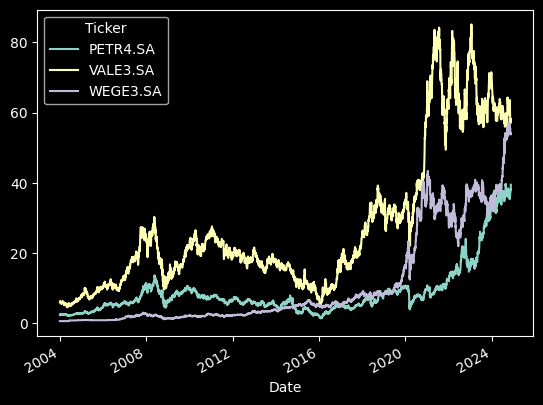

In [50]:
df.plot()

In [51]:
ret = df.pct_change().apply(lambda x: np.log(1+x)).dropna()
media_retornos = ret.mean()
matriz_cov = ret.cov()

media_retornos

Ticker
PETR4.SA    0.000551
VALE3.SA    0.000440
WEGE3.SA    0.000889
dtype: float64

In [53]:
N = 100000
retornos_esperados = np.zeros(N)
volatilidades_esperadas = np.zeros(N)
tabela_sharpe = np.zeros(N)
tabela_pesos = np.zeros((N,len(acoes)))

for k in range(N):
    pesos = np.random.random(len(acoes))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k, :] = pesos

    retornos_esperados[k] = np.sum(media_retornos * pesos * 252)
    volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov*252, pesos)))
    tabela_sharpe[k] = retornos_esperados[k]/volatilidades_esperadas[k]

In [54]:
i_shape_max = tabela_sharpe.argmax()
tabela_pesos[i_shape_max]

array([0.12931203, 0.04541975, 0.82526822])